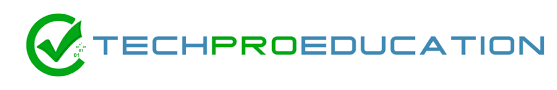

<div class="alert alert-block alert-info alert">

# <span style=" color:red">WELCOME!
    
Welcome to "Bike Demand Visualization Project" which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.</span>


<div class="alert alert-block alert-success ">

## <span style=" color:red">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc. Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.
    
# <span style=" color:red"> Bike Demand Visualization Project - Tasks
</span>





# **Table of Contents**


1. [Import libraries](#1)
1. [Read Data](#2)
1. [Check Missing Values](#3)
1. [Clean-up the dataset for integer values which refers specific values. Integer --> Wording](#4)
1. [Feature Engineering - segregate day, month and year from timestamp](#5)
1. [Usage by day, season, weather, holiday, hours and weekend](#6)
1. [Conclusion](#7)

## Import Libraries

In [5]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

## Read Dataset


In [6]:
df=pd.read_csv("store_sharing.csv")
df.sample(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
15622,10/21/2016 6:00,649,10.0,8.0,88.0,15.0,2,0,0,2
8908,01/12/2016 01:00,44,5.0,1.0,87.0,20.5,3,0,0,3
12572,6/13/2016 17:00,2533,16.5,16.5,80.0,19.0,7,0,0,1
16020,11/06/2016 21:00,248,7.0,3.0,81.0,24.0,7,0,1,2
6733,10/12/2015 14:00,1210,13.0,13.0,59.0,15.0,2,0,0,2


## Check missing and dublicated values


In [7]:
df.shape

(17414, 10)

In [3]:
# Null values check;
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

* There is not any null value in data set.

In [8]:
# Duplicated rows check; 
df.duplicated().value_counts()

False    17414
Name: count, dtype: int64

In [4]:
# Duplicated rows check; 
df.duplicated().sum()

0

* There is not any duplicate row in data set. 

 ## Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode) 

In [ ]:
# In order to analyse the distribution of the data, "displot", "hisplot" or "kdeplot" are generally used. 
# Count and bar plot for categorical plots.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  int64  
 7   is_holiday    17414 non-null  int64  
 8   is_weekend    17414 non-null  int64  
 9   season        17414 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.3+ MB


### Chancing datatypes 
* Categorical variables such as "season", "haliday", "weekend" and "weathercode" have float64 data type. 
* Before starting the analyses, we want to transform them into categorical (object) variables.

In [9]:
# Season
df['season'].replace(0, 'Spring', inplace=True)
df['season'].replace(1, 'Summer', inplace=True)
df['season'].replace(2, 'Fall', inplace=True)
df['season'].replace(3, 'Winter', inplace=True)

#--------------------------------------------------

#Is Holiday
df['is_holiday'].replace(1, 'Holiday', inplace=True)
df['is_holiday'].replace(0, 'Non-holiday', inplace=True)

#--------------------------------------------------------

# Is weekend
df['is_weekend'].replace(1, 'Weekend', inplace=True)
df['is_weekend'].replace(0, 'Non-weekend', inplace=True)

#------------------------------------------------------------

#Weather Codes
df['weather_code'].replace(1, 'Clear', inplace=True)
df['weather_code'].replace(2, 'scattered clouds', inplace=True)
df['weather_code'].replace(3, 'Broken clouds', inplace=True)
df['weather_code'].replace(4, 'Cloudy', inplace=True)
df['weather_code'].replace(7, 'Rain', inplace=True)
df['weather_code'].replace(10, 'rain with thunderstorm', inplace=True)
df['weather_code'].replace(26, 'snowfall', inplace=True)
df['weather_code'].replace(94, 'Freezing Fog', inplace=True)
df.head(3)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,01/04/2015 00:00,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,Weekend,Winter
1,01/04/2015 01:00,138,3.0,2.5,93.0,5.0,Clear,Non-holiday,Weekend,Winter
2,01/04/2015 02:00,134,2.5,2.5,96.5,0.0,Clear,Non-holiday,Weekend,Winter


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  object 
 7   is_holiday    17414 non-null  object 
 8   is_weekend    17414 non-null  object 
 9   season        17414 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


* Categorical variables such as "season", "haliday", "weekend" and "weathercode" turned to object data type, now.

### Feature Engineering - segregate day and month from timestamp

"timestamp" is in object form. We should change it to "datetime" for excracting day and month infos. 

In [12]:
df['date'] = pd.to_datetime(df['timestamp']) # Alternative way; df.timestamp = pd.to_datetime(df.timestamp). We assigned it to itself to make the change permanent. 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  object        
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  object        
 7   is_holiday    17414 non-null  object        
 8   is_weekend    17414 non-null  object        
 9   season        17414 non-null  object        
 10  date          17414 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 1.5+ MB


 * Now we have  date column which include date infos in the tadetime type. 

In [22]:
# Let`s exctarct the day and month names from `date` column.

df['day'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()
df.head(2)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,day,month
0,01/04/2015 00:00,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,Weekend,Winter,2015-01-04 00:00:00,Sunday,January
1,01/04/2015 01:00,138,3.0,2.5,93.0,5.0,Clear,Non-holiday,Weekend,Winter,2015-01-04 01:00:00,Sunday,January


In [73]:
#Check sum of bike-sharing/renting records per day:

monthly_bike_share  = df.groupby('day')['cnt'].sum()
monthly_bike_share

day
Friday       2897793
Monday       2834719
Saturday     2454040
Sunday       2403716
Thursday     3136956
Tuesday      3081414
Wednesday    3097334
Name: cnt, dtype: int64

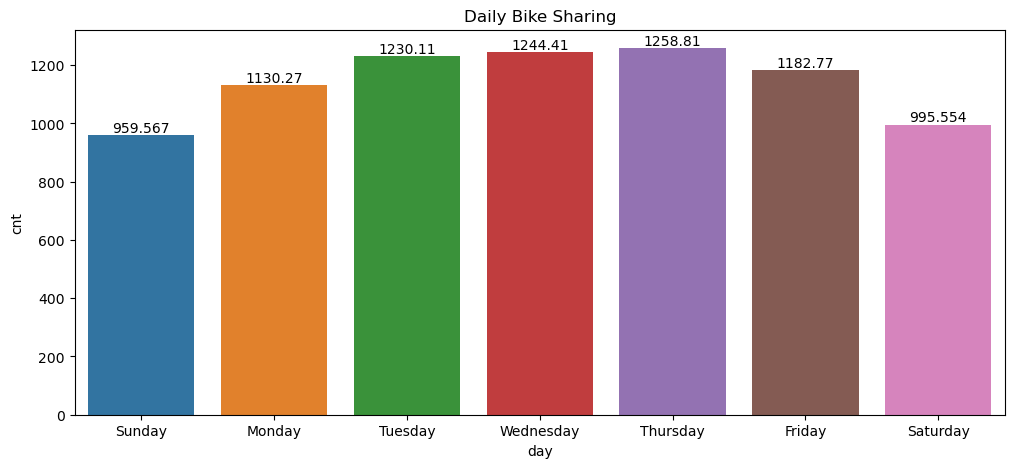

In [71]:
# Day

plt.figure(figsize=(12,5))

ax=sns.barplot(data=df, x="day", y="cnt", errorbar=None)
ax.set_title("Daily Bike Sharing")

for i in ax.containers:
    ax.bar_label(i)

* Bike sharing is less on Mondays and Saturdasy, but high on weekdays. 

In [74]:
# Month

monthly_bike_share  = df.groupby('month')['cnt'].sum()
monthly_bike_share

month
April        1600427
August       2171265
December     1254746
February     1136504
January      1166837
July         2286214
June         1967130
March        1352461
May          1897348
November     1381191
October      1800752
September    1891097
Name: cnt, dtype: int64

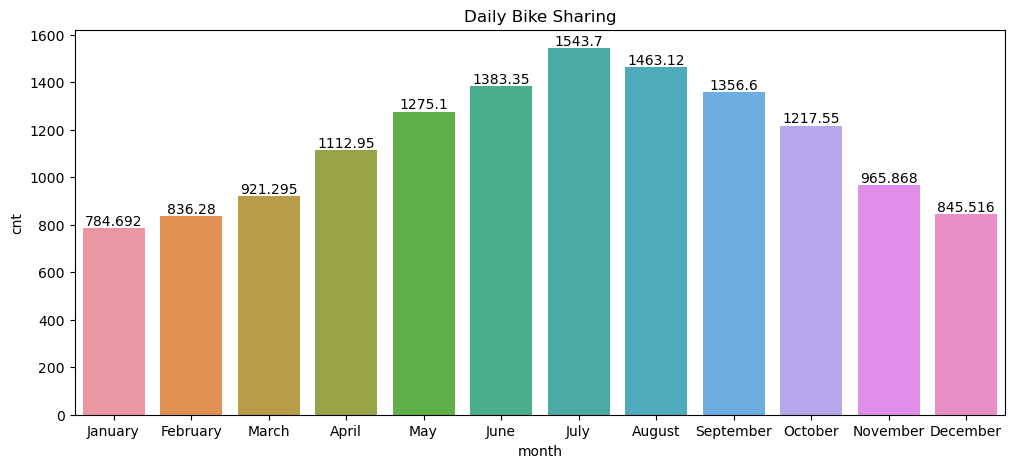

In [72]:
# Month

plt.figure(figsize=(12,5))

ax=sns.barplot(data=df, x="month", y="cnt", errorbar=None)
ax.set_title("Daily Bike Sharing")

for i in ax.containers:
    ax.bar_label(i)

* Bike sharing is less in January, February and December. But it is high in summer time.

### Usage by season, wheather, holiday and weekend

In [75]:
#Season 

seasonally_bike_share  = df.groupby('season')['cnt'].sum()
seasonally_bike_share

season
Fall      5073040
Spring    4850236
Summer    6424609
Winter    3558087
Name: cnt, dtype: int64

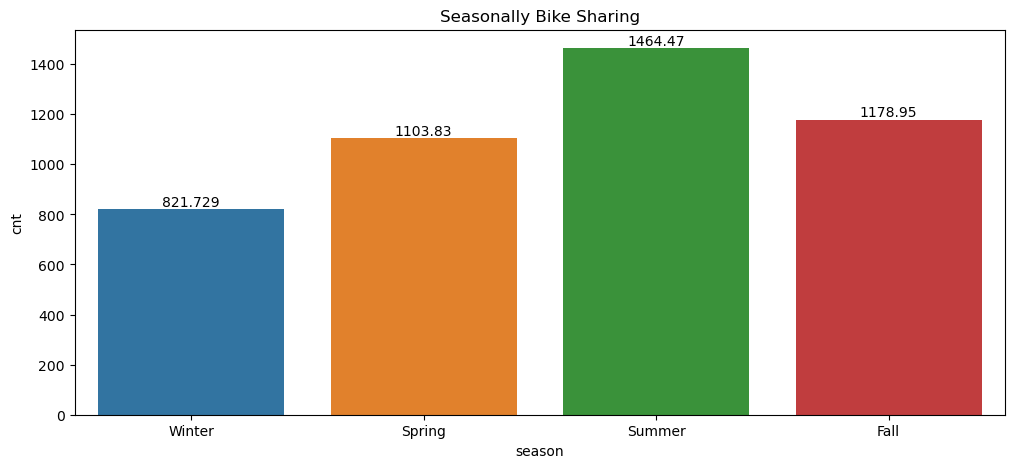

In [76]:
#Season 

plt.figure(figsize=(12,5))

ax=sns.barplot(data=df, x="season", y="cnt", errorbar=None)
ax.set_title("Seasonally Bike Sharing")

for i in ax.containers:
    ax.bar_label(i)

* Bike sharing is low i the winter season adn high in the summer time.

In [77]:
# Weather 

weather_bike_share  = df.groupby('weather_code')['cnt'].sum()
weather_bike_share

weather_code
Broken clouds             4243887
Clear                     7146847
Cloudy                     929978
Rain                      1526461
rain with thunderstorm       8168
scattered clouds          6035580
snowfall                    15051
Name: cnt, dtype: int64

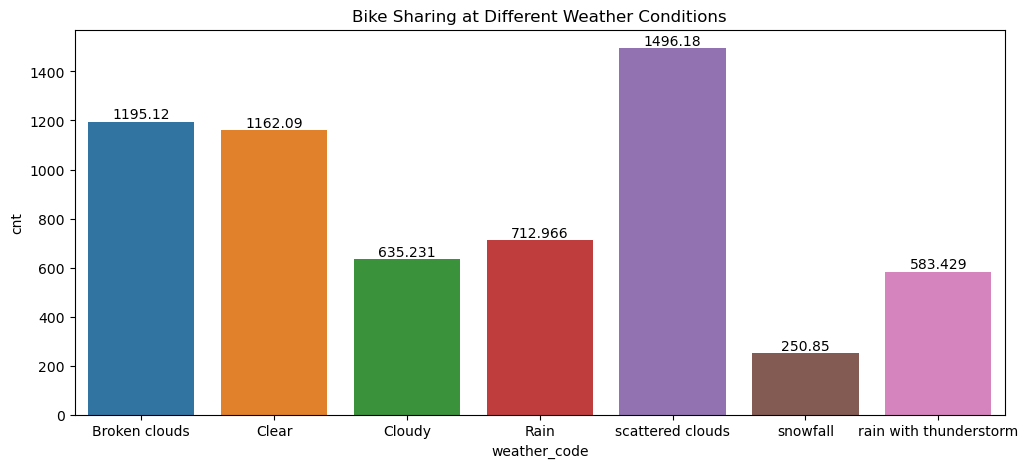

In [89]:
plt.figure(figsize=(12,5))

ax=sns.barplot(data=df, x="weather_code", y="cnt", errorbar=None)
ax.set_title("Bike Sharing at Different Weather Conditions")

for i in ax.containers:
    ax.bar_label(i)

 * Bike sharing high at scattered cloudly days.

In [81]:
# Holiday 

weather_bike_share  = df.groupby("is_holiday")['cnt'].sum()
weather_bike_share

is_holiday
Holiday          295498
Non-holiday    19610474
Name: cnt, dtype: int64

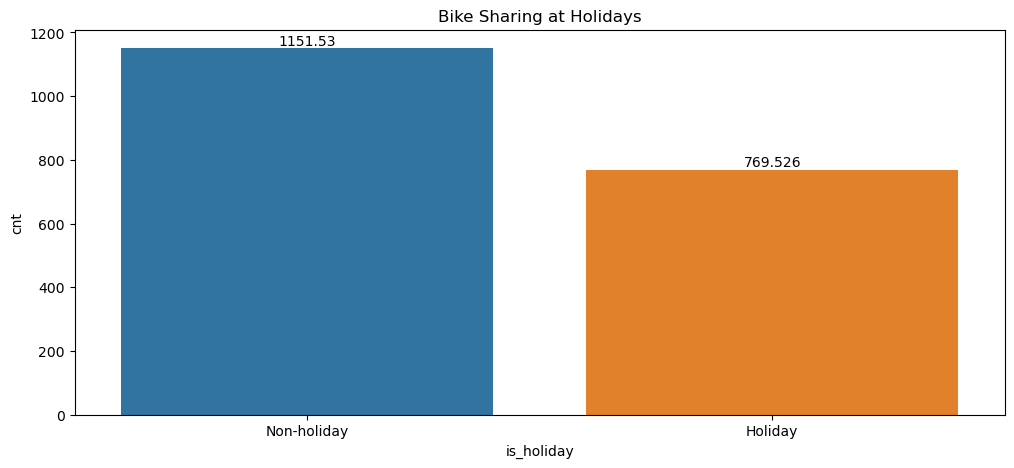

In [87]:
# Holiday 

plt.figure(figsize=(12,5))

ax=sns.barplot(data=df, x="is_holiday", y="cnt", errorbar=None)
ax.set_title("Bike Sharing at Holidays")

for i in ax.containers:
    ax.bar_label(i)

* Bike sharing high at non-holidays.

In [83]:
# Weekend 

weekend_bike_share  = df.groupby('is_weekend')['cnt'].sum()
weekend_bike_share

is_weekend
Non-weekend    15048216
Weekend         4857756
Name: cnt, dtype: int64

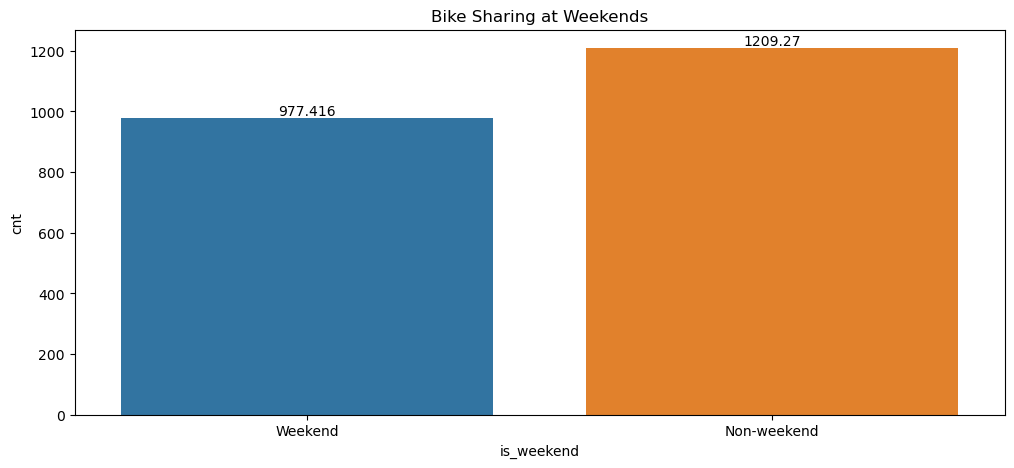

In [88]:
# Weekend

plt.figure(figsize=(12,5))

ax=sns.barplot(data=df, x="is_weekend", y="cnt", errorbar=None)
ax.set_title("Bike Sharing at Weekends")

for i in ax.containers:
    ax.bar_label(i)

In [ ]:
Bike sharing high on week days.

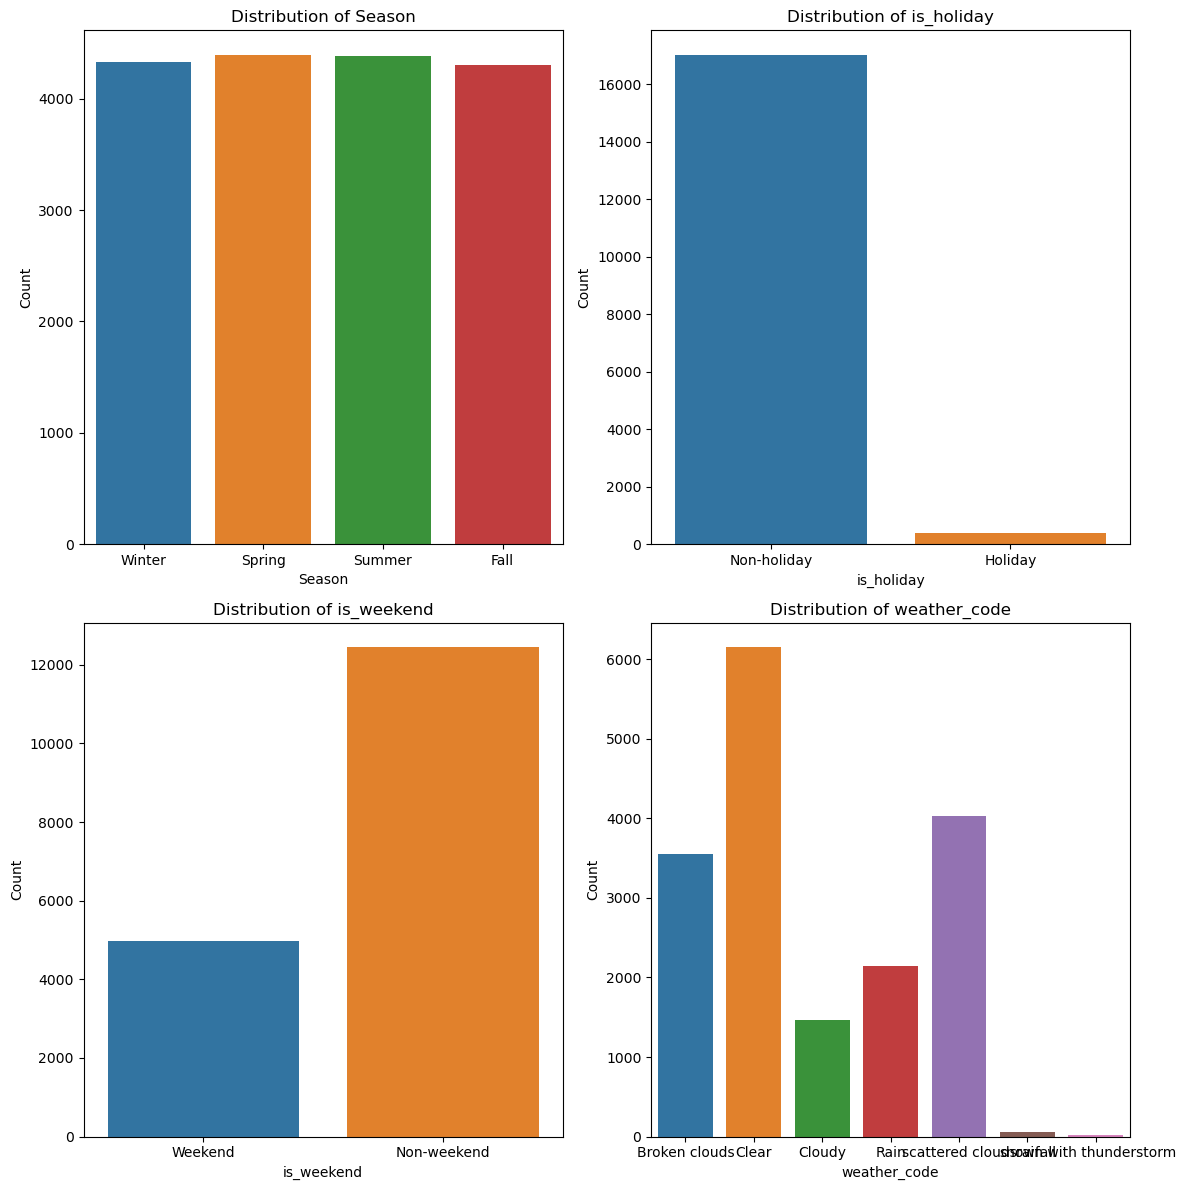

In [91]:
# 2. Way:

fig, ax = plt.subplots(2,2, figsize=(12, 12))

# first plot by season
sns.countplot(data=df, x="season", ax = ax[0][0])
ax[0][0].set_xlabel("Season")
ax[0][0].set_ylabel('Count')
ax[0][0].set_title('Distribution of Season')

# second plot by holiday
sns.countplot(data=df, x="is_holiday", ax=ax[0][1])
ax[0][1].set_xlabel("is_holiday")
ax[0][1].set_ylabel('Count')
ax[0][1].set_title('Distribution of is_holiday')

# third plot by weekend
sns.countplot(data=df, x="is_weekend", ax=ax[1][0])
ax[1][0].set_xlabel("is_weekend")
ax[1][0].set_ylabel('Count')
ax[1][0].set_title('Distribution of is_weekend')

# fourth plot by weather code
sns.countplot(data=df, x="weather_code", ax=ax[1][1])
ax[1][1].set_xlabel("weather_code")
ax[1][1].set_ylabel('Count')
ax[1][1].set_title('Distribution of weather_code')

fig.tight_layout()
plt.show()

* People rent bicycles most often on days when the weather is "clear". In second place are the days with "scatter clouds" and in third place are the days with "broken clouds". Interestingly, more bicycles are rented on "rainy" days than on "cloudy" days. On snowy and stormy days, bicycle hire is around zero.
* Demand for bicycle hire is higher on working days and on days with clear weather.

### Distribution Analyses

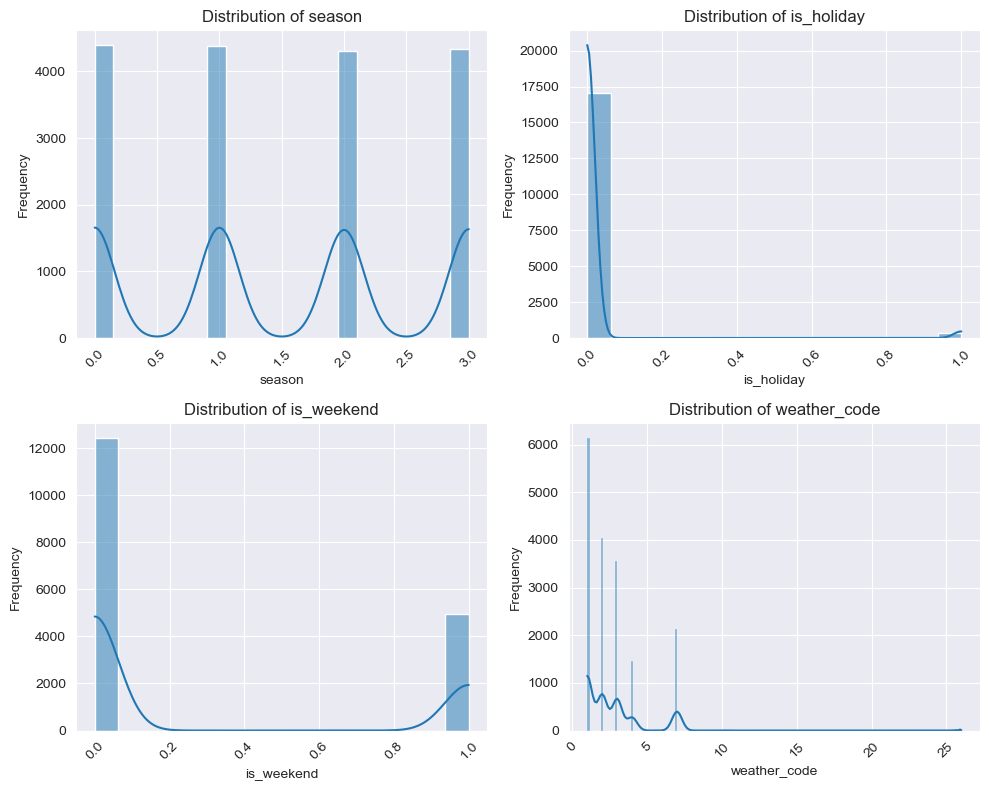

In [61]:
# For distribution analyses by OOM;

df_discrete = ["season", "is_holiday", "is_weekend", "weather_code"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
fig.tight_layout()

for i, ax in enumerate(axes.flat):
    feature = df_discrete[i]
    
    # Create a histogram for each feature
    sns.histplot(data=df, x=feature, kde=True, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.set_title('Distribution of ' + feature)
    
    # If it is necessary; Rotate x-axis 
    ax.tick_params(axis='x', rotation=45)
    
fig.tight_layout()
plt.show()

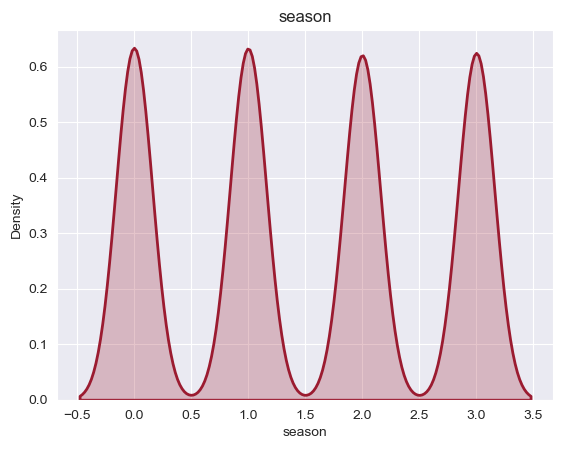

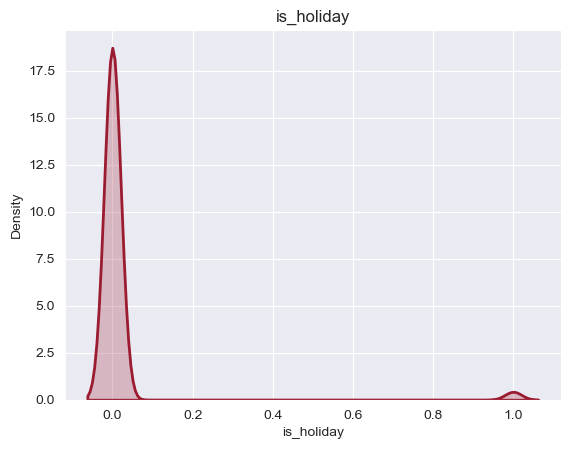

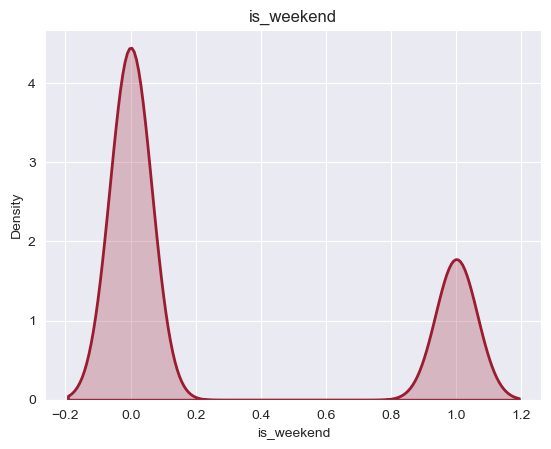

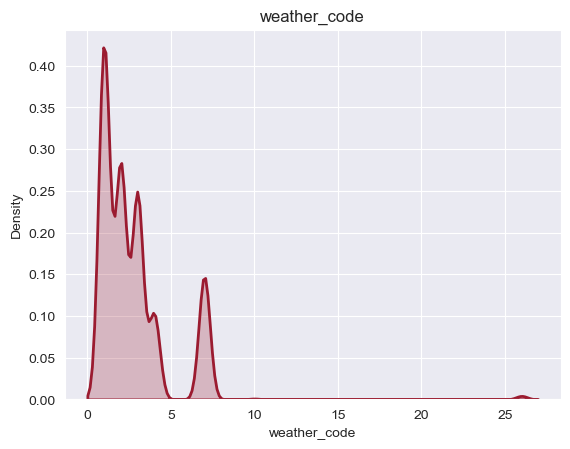

In [12]:
df_discrete = ["season", "is_holiday", "is_weekend", "weather_code"]
for i in df_discrete:
    sns.kdeplot(data = df, x = i, fill = True, linewidth = 2, color = "#9B1B30")
    # if there was hue parameter we would have used palette instead of color.
    plt.title(i)
    plt.show()

* Demand for bicycle hire is higher on working days and on days with clear weather. 

In [10]:
df.head(1)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,01/04/2015 00:00,182,3.0,2.0,93.0,6.0,3,0,1,3


#### boxenplots for outlier analyses

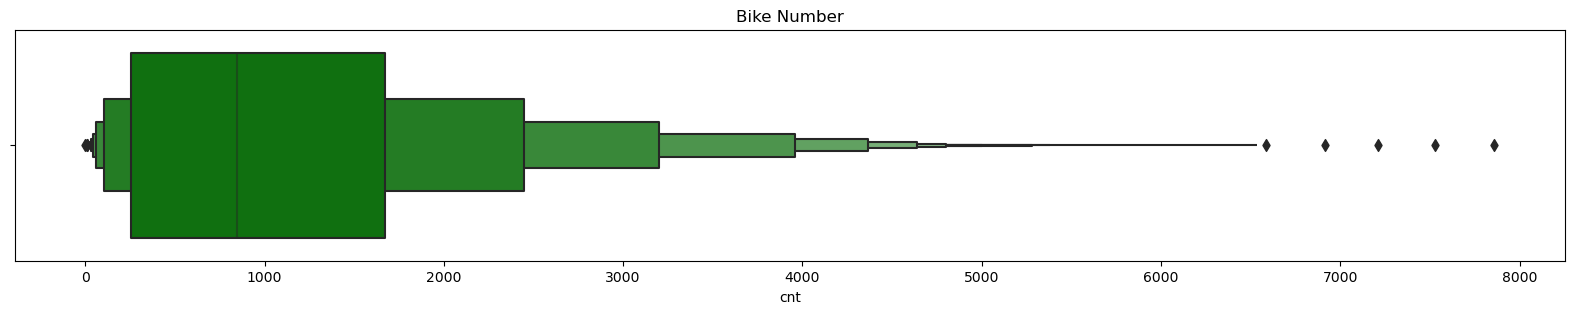

In [93]:
plt.figure(figsize=(20,3))
plt.title('Bike Number')
sns.boxenplot(x=df["cnt"], color='g');

* There are 5 outlier in shared bike umber (cnt) on the higher side.

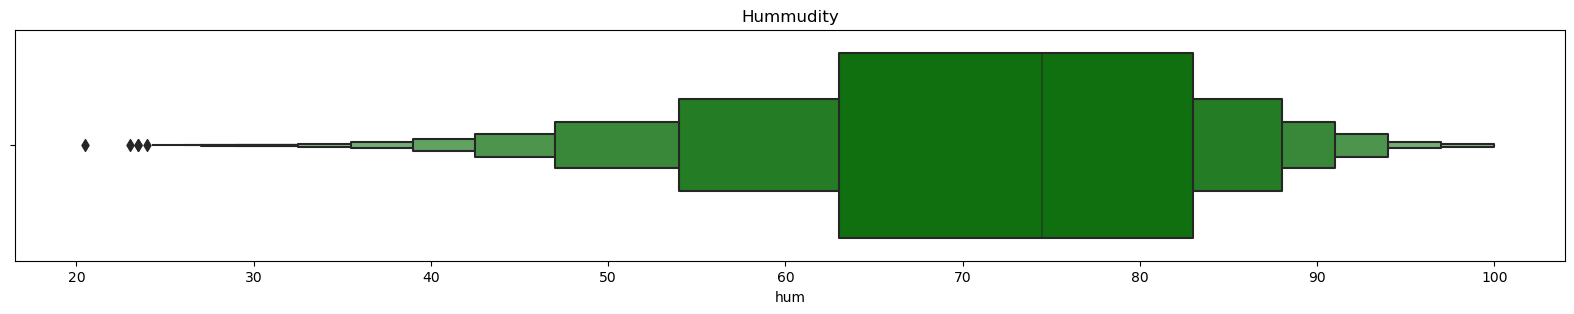

In [94]:
plt.figure(figsize=(20,3))
plt.title('Hummudity')
sns.boxenplot(x=df["hum"], color='g');

* There are 4 outlier in hummudity on the low side. 

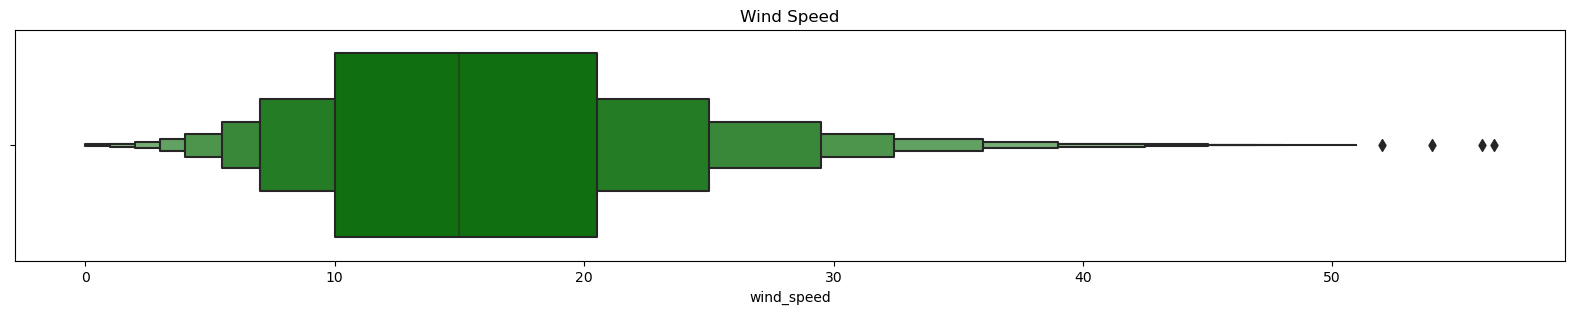

In [95]:
plt.figure(figsize=(20,3))
plt.title('Wind Speed')
sns.boxenplot(x=df["wind_speed"], color='g');

* There are 4 outlier in wind speed on the higher side.

### Look at the data type of each variable, transform timestamp in type, and set it as index.

In [109]:
df=pd.read_csv("store_sharing.csv")
df.sample(2)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
12614,6/15/2016 11:00,1322,19.5,19.5,52.5,16.0,2,0,0,1
6356,9/26/2015 20:00,860,14.5,14.5,65.0,12.0,1,0,1,2


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  int64  
 7   is_holiday    17414 non-null  int64  
 8   is_weekend    17414 non-null  int64  
 9   season        17414 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.3+ MB


In [111]:
#I want to use timestamp as index.
# If we don`t use timespamp as index, we couldn`t use next method for extracting date infos from timestamp;

df = df.set_index('timestamp') 
df.head(2)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
01/04/2015 00:00,182,3.0,2.0,93.0,6.0,3,0,1,3
01/04/2015 01:00,138,3.0,2.5,93.0,5.0,1,0,1,3


#### Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.


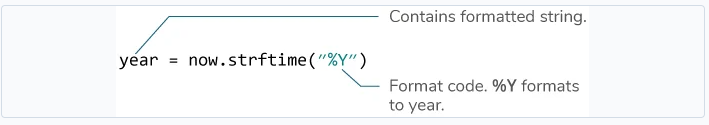

https://www.programiz.com/python-programming/datetime/strftime

Directive	Meaning	Example
* **%a**	Abbreviated weekday name.	Sun, Mon, ...
* **%A**	Full weekday name.	Sunday, Monday, ...
* **%w**	Weekday as a decimal number.	0, 1, ..., 6
* **%d**	Day of the month as a zero-padded decimal.	01, 02, ..., 31
* **%-d**	Day of the month as a decimal number.	1, 2, ..., 30
* **%b**	Abbreviated month name.	Jan, Feb, ..., Dec
* **%B**	Full month name.	January, February, ...
* **%m**	Month as a zero-padded decimal number.	01, 02, ..., 12
* **%-m**	Month as a decimal number.	1, 2, ..., 12
* **%y**	Year without century as a zero-padded decimal number.	00, 01, ..., 99
* **%-y**	Year without century as a decimal number.	0, 1, ..., 99
* **%Y**	Year with century as a decimal number.	2013, 2019 etc.
* **%H**	Hour (24-hour clock) as a zero-padded decimal number.	00, 01, ..., 23
* **%-H**	Hour (24-hour clock) as a decimal number.	0, 1, ..., 23
* **%I**	Hour (12-hour clock) as a zero-padded decimal number.	01, 02, ..., 12
* **%-I**	Hour (12-hour clock) as a decimal number.	1, 2, ... 12
* **%p**	Locale’s AM or PM.	AM, PM
* **%M**	Minute as a zero-padded decimal number.	00, 01, ..., 59
* **%-M**	Minute as a decimal number.	0, 1, ..., 59
* **%S**	Second as a zero-padded decimal number.	00, 01, ..., 59
* **%-S**	Second as a decimal number.	0, 1, ..., 59
* **%f**	Microsecond as a decimal number, zero-padded on the left.	000000 - 999999
* **%z**	UTC offset in the form +HHMM or -HHMM.	 
* **%Z**	Time zone name.	 
* **%j**	Day of the year as a zero-padded decimal number.	001, 002, ..., 366
* **%-j**	Day of the year as a decimal number.	1, 2, ..., 366
* **%U**	Week number of the year (Sunday as the first day of the week). All days in a new year preceding the first Sunday are considered to be in week 0.	00, 01, ..., 53
* **%W**	Week number of the year (Monday as the first day of the week). All days in a new year preceding the first Monday are considered to be in week 0.	00, 01, ..., 53
* **%c**	Locale’s appropriate date and time representation.	Mon Sep 30 07:06:05 2013
* **%x**	Locale’s appropriate date representation.	09/30/13
* **%X**	Locale’s appropriate time representation.	07:06:05
* **%%**	A literal '%' character.	%

In [113]:
df["year"] = df.index.strftime("%Y")   
# 2.YOL: df['year'] = df.index.year <-- bunun çalışabilmesi için timestamp'ın index olarak set edilmiş olması gerekiyor. 
df["year"] 
#Yılı boyle alabıldım. Diğerlerini de alacağım.

AttributeError: 'Index' object has no attribute 'strftime'

In [59]:
# Haftanın kacınıcı gunu

df["day"] = df.index.strftime("%w") # df['day_of_week'] = df.index.day_name() bu da var ama gün isimlerini getiriyor. O günün, haftanın kacıncı gunu olduğunu getirmiyor. 
df["day"]

timestamp
2015-01-04 00:00:00    0
2015-01-04 01:00:00    0
2015-01-04 02:00:00    0
2015-01-04 03:00:00    0
2015-01-04 04:00:00    0
                      ..
2017-01-03 19:00:00    2
2017-01-03 20:00:00    2
2017-01-03 21:00:00    2
2017-01-03 22:00:00    2
2017-01-03 23:00:00    2
Name: day, Length: 17414, dtype: object

In [22]:
# Gun isimleri
df['day_name'] = df.index.day_name()
df['day_name'] 

timestamp
2015-01-04 00:00:00     Sunday
2015-01-04 01:00:00     Sunday
2015-01-04 02:00:00     Sunday
2015-01-04 03:00:00     Sunday
2015-01-04 04:00:00     Sunday
                        ...   
2017-01-03 19:00:00    Tuesday
2017-01-03 20:00:00    Tuesday
2017-01-03 21:00:00    Tuesday
2017-01-03 22:00:00    Tuesday
2017-01-03 23:00:00    Tuesday
Name: day_name, Length: 17414, dtype: object

* I checked on internet and yes 4th day oj Januray, 2015 is Sunday. 

In [58]:
# Ayın kacıncı gunu

df["month"] = df.index.strftime("%d") # 2.YOL: df['day_of_month'] = df.index.day
df["month"]

timestamp
2015-01-04 00:00:00    04
2015-01-04 01:00:00    04
2015-01-04 02:00:00    04
2015-01-04 03:00:00    04
2015-01-04 04:00:00    04
                       ..
2017-01-03 19:00:00    03
2017-01-03 20:00:00    03
2017-01-03 21:00:00    03
2017-01-03 22:00:00    03
2017-01-03 23:00:00    03
Name: month, Length: 17414, dtype: object

In [24]:
# hour   
df["hour"] = df.index.strftime("%H")
df["hour"]

timestamp
2015-01-04 00:00:00    00
2015-01-04 01:00:00    01
2015-01-04 02:00:00    02
2015-01-04 03:00:00    03
2015-01-04 04:00:00    04
                       ..
2017-01-03 19:00:00    19
2017-01-03 20:00:00    20
2017-01-03 21:00:00    21
2017-01-03 22:00:00    22
2017-01-03 23:00:00    23
Name: hour, Length: 17414, dtype: object

In [28]:
# Hour; 2. Way;

df['hour2'] = df.index.hour

In [31]:
# For seasons;

df['season'] = df.index.quarter
df['season']

timestamp
2015-01-04 00:00:00    1
2015-01-04 01:00:00    1
2015-01-04 02:00:00    1
2015-01-04 03:00:00    1
2015-01-04 04:00:00    1
                      ..
2017-01-03 19:00:00    1
2017-01-03 20:00:00    1
2017-01-03 21:00:00    1
2017-01-03 22:00:00    1
2017-01-03 23:00:00    1
Name: season, Length: 17414, dtype: int32

In [73]:
df.head(2)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,day_of_week,day_of_month,hour,hour2
timestamp,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,1,2015,0,04,00,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,1,2015,0,04,01,1


#### Visualize the correlation with a heatmap


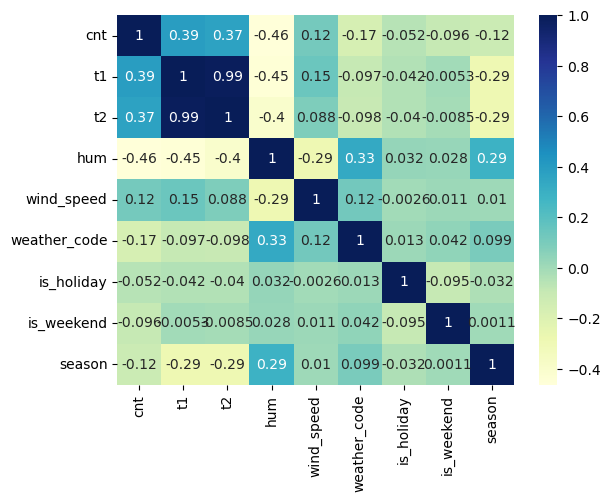

In [114]:
sns.heatmap(df.select_dtypes("number").corr(), cmap="YlGnBu", annot=True);

* There is a very high (0.99) correlation between the announced air temperature (t1) and the sensed air temperature (t2) and it would be appropriate to include only one of them in the ML analyses. 
* There is a positive and relatively strong (0.39) relationship between air temperature and the number of bicycles rented. 
* There is a negative and relatively strong (0.45) relationship between air temperature (t1) and humidity. 
* There is a negative and relatively strong (0.29) relationship between wind speed and humidity. 


#### Visualize the correlation of the target variable and the other features with barplot


In [4]:
# Corr():

df_corr_cnt = df.select_dtypes("number").corr()[["cnt"]].sort_values(by="cnt", ascending=False) # 2. way; df.corr().cnt
df_corr_cnt

,cnt
cnt,1.000000
t1,0.388798
t2,0.369035
wind_speed,0.116295
is_holiday,-0.051698
is_weekend,-0.096499
season,-0.116180
weather_code,-0.166633
hum,-0.462901


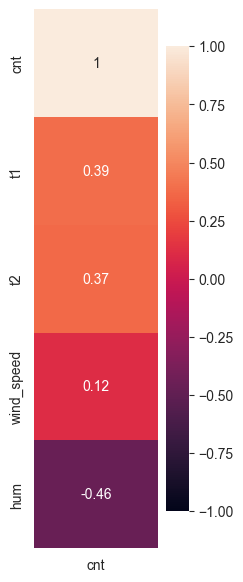

In [122]:
plt.figure(figsize=(2,7))
sns.heatmap(df_corr_cnt, annot=True, vmin=-1, vmax=1);

* There is a positive correlation between bike sharing and temperature and a negative correlation between bike sharing and humidity. 

In [21]:
# Relation with the target variable (cnt) and other variables by barplot

target_corr = target_corr.drop("cnt")

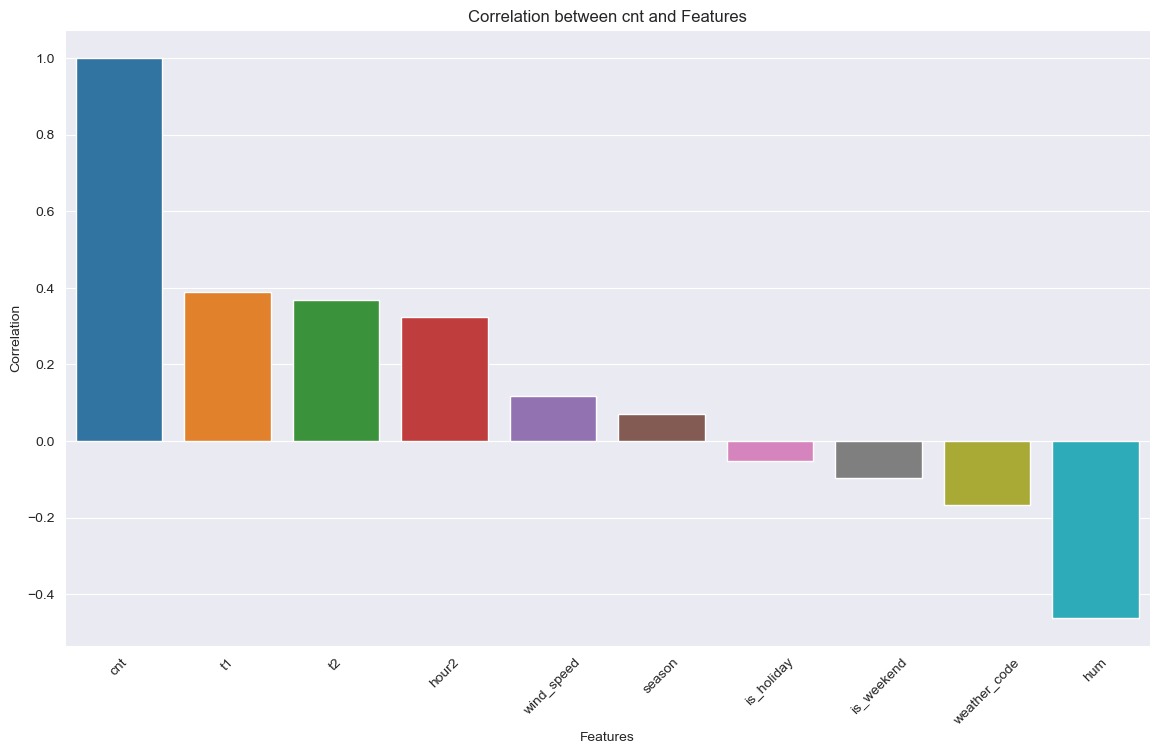

In [36]:
plt.figure(figsize=(14, 8))
sns.barplot(x=target_corr.index, y=target_corr.values)
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Correlation between cnt and Features')
plt.xticks(rotation=45) # in OOM we use ax.tick_params(axis = "x", rotation = 45) instead
plt.show()

In [34]:
# Let's sort them from large to small according to the target parameter;
target_corr = target_corr.sort_values(ascending=False)

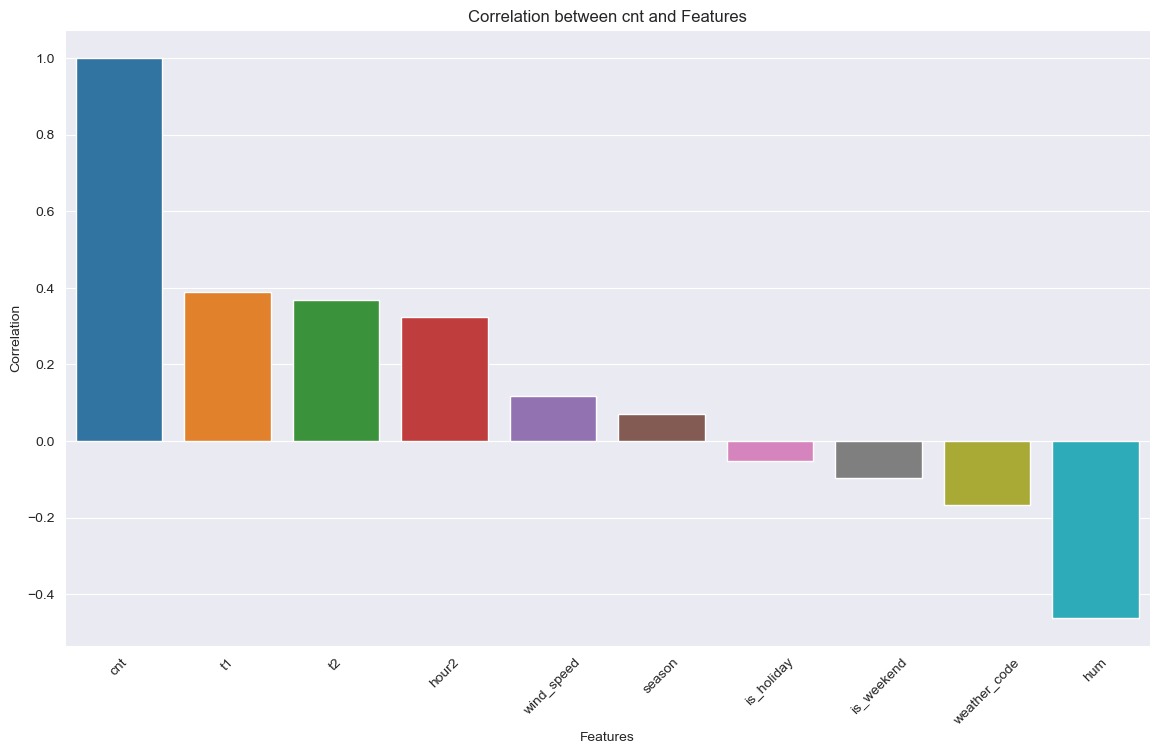

In [35]:
plt.figure(figsize=(14, 8))
sns.barplot(x=target_corr.index, y=target_corr.values)
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Correlation between cnt and Features')
plt.xticks(rotation=45) # in OOM we use ax.tick_params(axis = "x", rotation = 45) instead
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">9. Plot bike shares over time use lineplot.
</span>

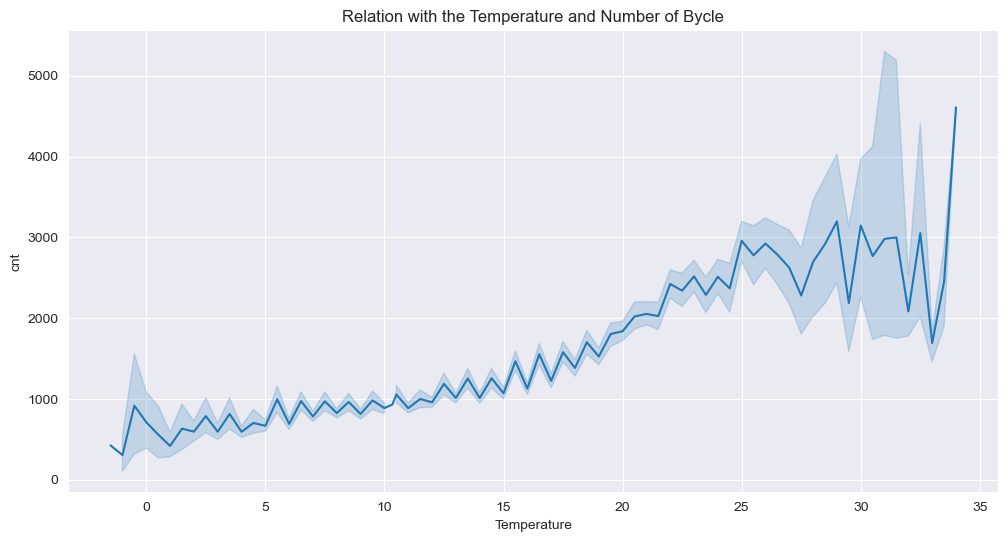

In [40]:
# Relation with the target variable (cnt) and temperature (t1) with lineplot

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="t1", y="cnt")
plt.title("Relation with the Temperature and Number of Bycle")
plt.xlabel("Temperature")

plt.show()

* As the air temperature increases, the number of bicycle rentals also increases, and when the air temperature exceeds 33 degrees Celsius, the number of bicycle rentals increases very quickly. Then when temperature exceeds 33 the number of bicycle rentals increases sharply.

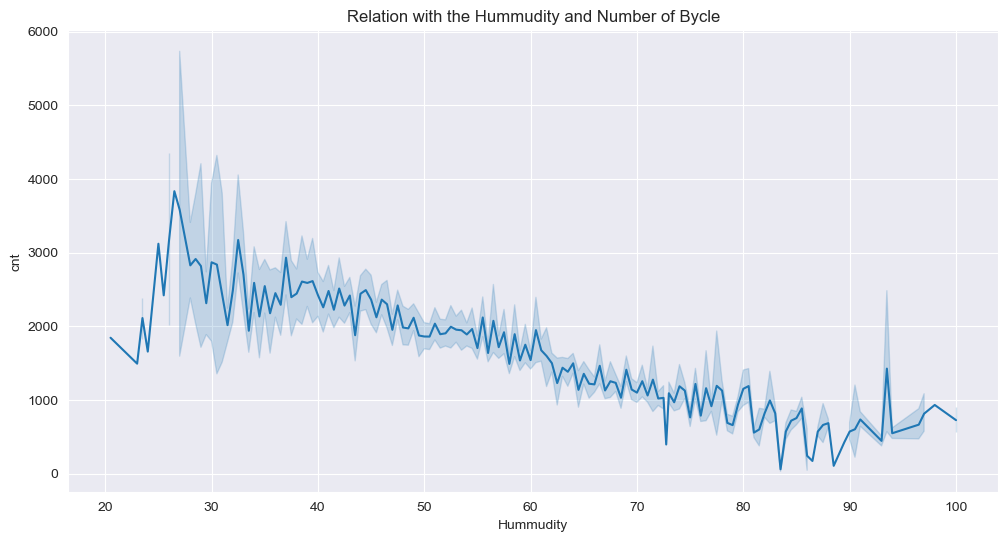

In [42]:
# Relation with the target variable (cnt) and hummudity (hum)  with lineplot

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="hum", y="cnt")
plt.title("Relation with the Hummudity and Number of Bycle")
plt.xlabel("Hummudity")

plt.show()

* There is anegative relatrionship between hummidity and number of bike sharing.  

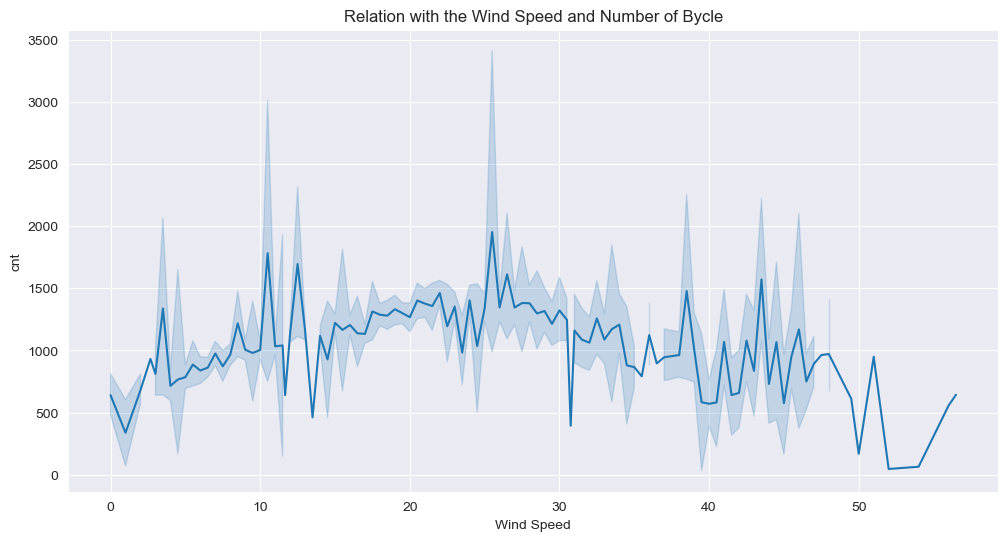

In [43]:
# Relation with the target variable (cnt) and wind speed (wind_speed)  with lineplot

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="wind_speed", y="cnt")
plt.title("Relation with the Wind Speed and Number of Bycle")
plt.xlabel("Wind Speed")

plt.show()

* There is a concave parabolic relationship between wind speed and bicycle hire. 
* While people prefer to rent bicycles in light windy weather, they give up renting bicycles when the wind speed exceeds 26 km/h.  

<div class="alert alert-warning alert-info">
<span style=" color:red">10. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

In [44]:
df=pd.read_csv("store_sharing.csv")

In [45]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [46]:
df = df.set_index('timestamp') 

In [47]:
df["year_month"] = df.index.strftime('%Y-%m')
df["year_month"]

timestamp
2015-01-04 00:00:00    2015-01
2015-01-04 01:00:00    2015-01
2015-01-04 02:00:00    2015-01
2015-01-04 03:00:00    2015-01
2015-01-04 04:00:00    2015-01
                        ...   
2017-01-03 19:00:00    2017-01
2017-01-03 20:00:00    2017-01
2017-01-03 21:00:00    2017-01
2017-01-03 22:00:00    2017-01
2017-01-03 23:00:00    2017-01
Name: year_month, Length: 17414, dtype: object

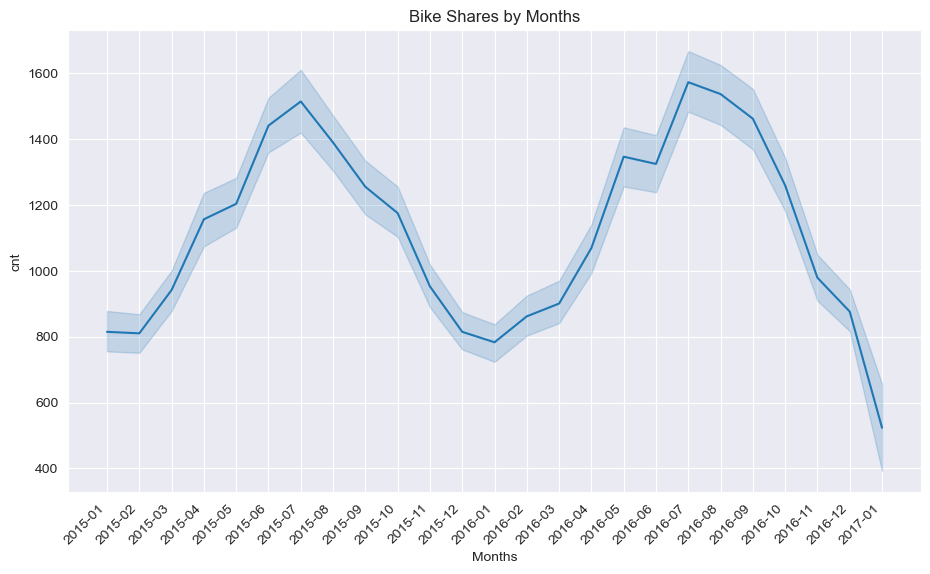

In [55]:
#  Bike shares by months with lineplot 

plt.figure(figsize=(11,6))

sns.lineplot(data=df, x="year_month", y="cnt")
plt.title("Bike Shares by Months")
plt.xlabel("Months")
#plt.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.xticks(rotation=45)

plt.show()

* Demand for bicycle hire increases rapidly from March onwards, peaks in July and then starts to decline. The decline in demand accelerates after October, reaching its lowest levels between December and March. 

In [60]:
df.month

timestamp
2015-01-04 00:00:00    04
2015-01-04 01:00:00    04
2015-01-04 02:00:00    04
2015-01-04 03:00:00    04
2015-01-04 04:00:00    04
                       ..
2017-01-03 19:00:00    03
2017-01-03 20:00:00    03
2017-01-03 21:00:00    03
2017-01-03 22:00:00    03
2017-01-03 23:00:00    03
Name: month, Length: 17414, dtype: object

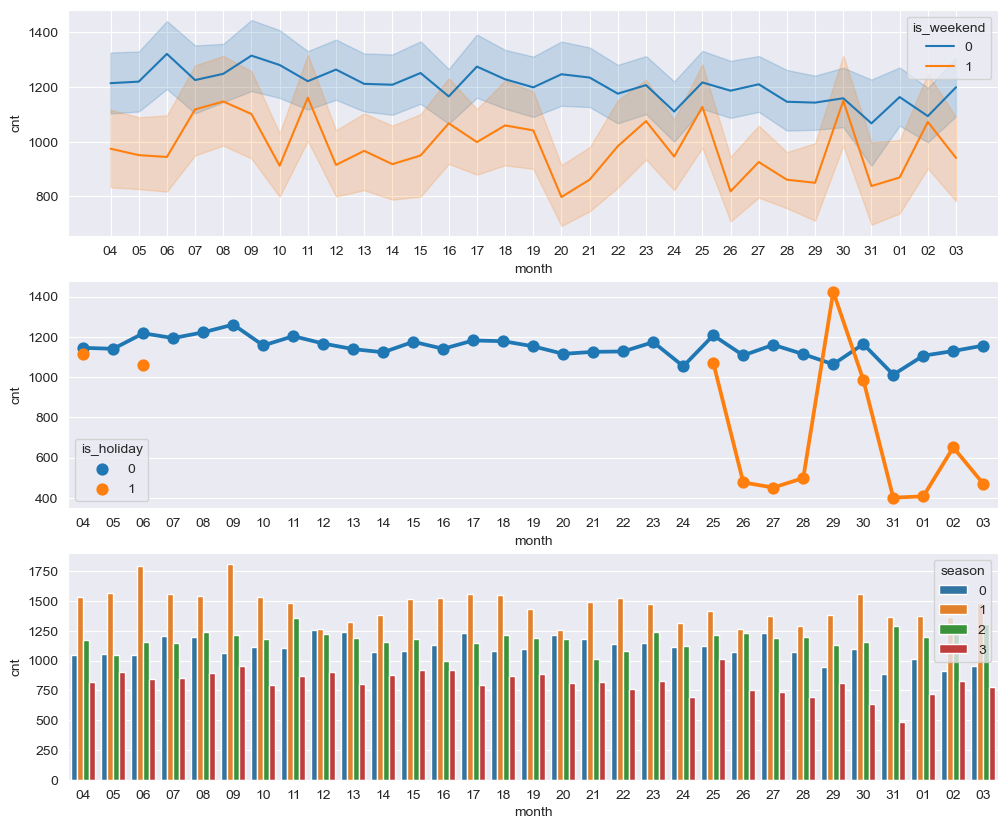

In [67]:
# In order to be able to make this analysis by taking into account the changes over the years;

fig, ax = plt.subplots(3,1, figsize=(12,10))

sns.lineplot(data=df,  x = "month", y="cnt", ax =ax[0], hue = "is_weekend")
sns.pointplot(data=df, x = "month", y="cnt", ax =ax[1], hue = "is_holiday", errorbar=None)
sns.barplot(data=df,   x = "month", y="cnt", ax =ax[2], hue = "season", errorbar=None)

plt.show()

* The number / demand for bicycle hire decreases towards the end of the month. 

<div class="alert alert-warning alert-info">
<span style=" color:red">11. Plot bike shares by hours on (holidays, weekend, season).
</span>

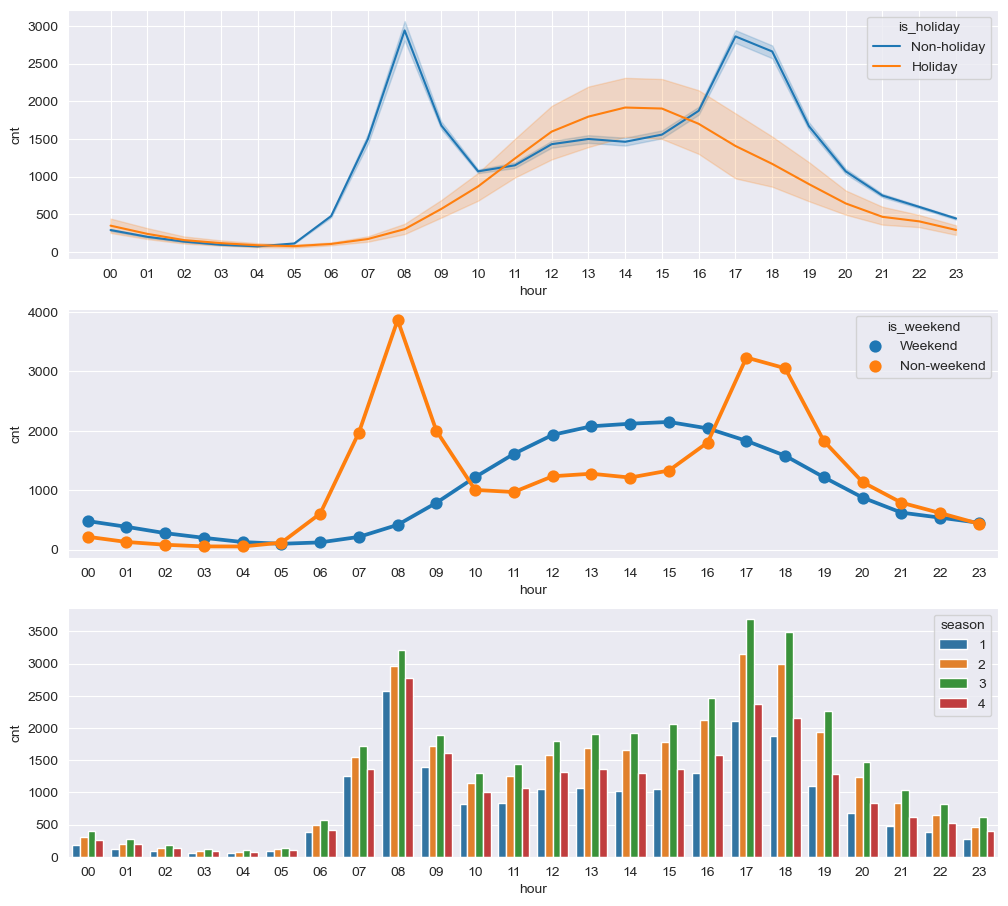

In [104]:
fig, ax = plt.subplots(3,1,figsize=(12,11))

sns.lineplot(data=df,  x="hour", y="cnt", hue="is_holiday", ax=ax[0])
sns.pointplot(data=df, x="hour", y="cnt", hue="is_weekend", ax=ax[1], errorbar=None)
sns.barplot(data=df,   x="hour", y="cnt", hue="season",     ax=ax[2], errorbar=None)

plt.show()

* Bu grafiklere göre; bisiklet kiralama talebi hafta içi günlerde sabah ve akşam saatlerinde, haftasonu ise 10-18 arasında yüksektir. 

<div class="alert alert-warning alert-info">
<span style=" color:red"> 12. Plot bike shares by day of week.

- You may want to see whether it is a holiday or not
</span>

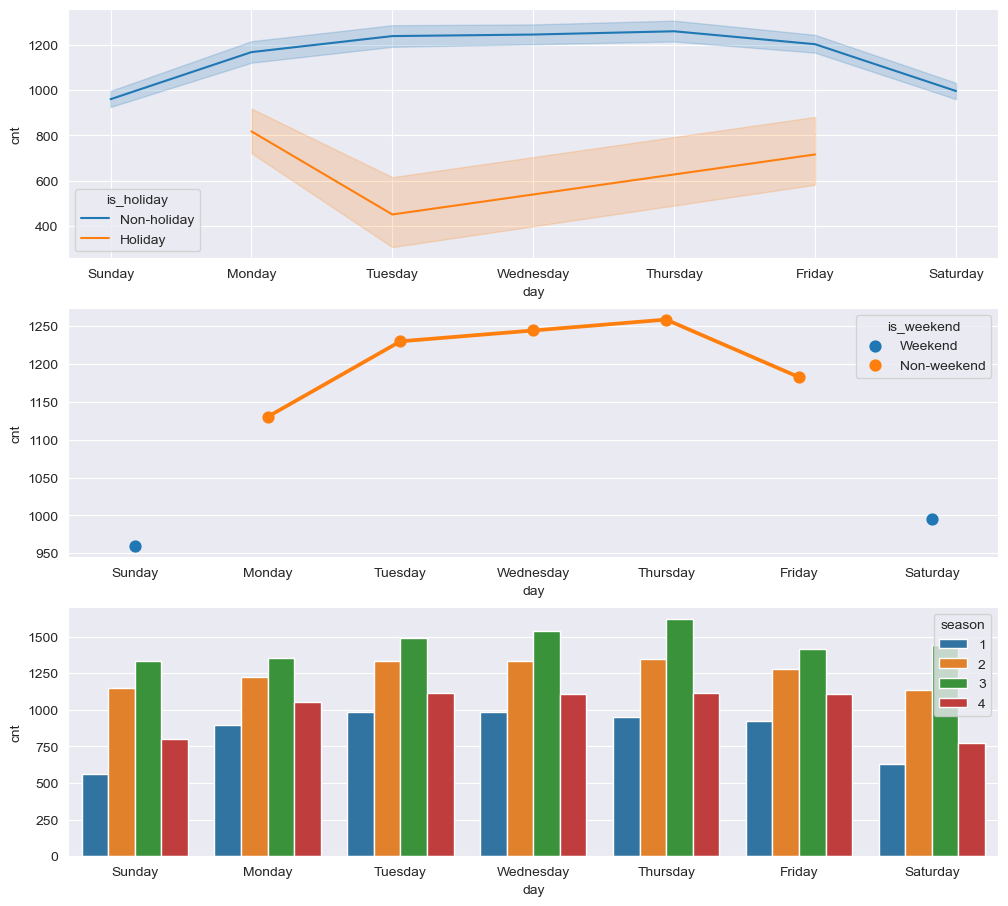

In [107]:
fig, ax = plt.subplots(3,1,figsize=(12,11))

sns.lineplot(data=df, x="day", y="cnt", hue="is_holiday", ax=ax[0])
sns.pointplot(data=df, x="day", y="cnt", hue="is_weekend", ax=ax[1], errorbar=None)
sns.barplot(data=df, x="day", y="cnt", hue="season", ax=ax[2], errorbar=None)

plt.show()

* Bicycle rental is higher on weekdays during non-holiday periods. It is higher at summers. 

In [109]:
df.head(2)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,day,month,year,year2,hour,new_feature,hour2
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken clouds,Non-holiday,Weekend,1,Sunday,January,2015,2015,00,1151.525191,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,Non-holiday,Weekend,1,Sunday,January,2015,2015,01,1151.525191,1


<div class="alert alert-warning alert-info">
<span style=" color:red"> 13. Plot bike shares by day of month
</span>

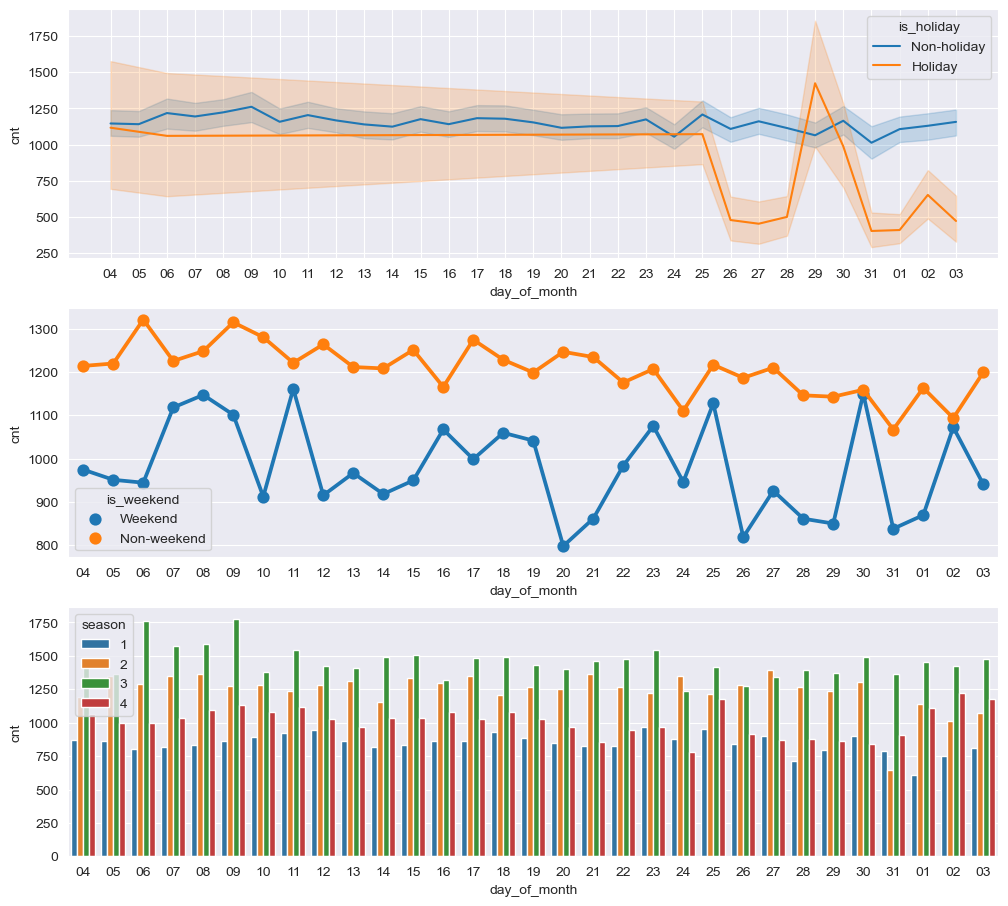

In [113]:
fig, ax = plt.subplots(3,1,figsize=(12,11))

sns.lineplot(data=df, x="day_of_month", y="cnt", hue="is_holiday", ax=ax[0])
sns.pointplot(data=df, x="day_of_month", y="cnt", hue="is_weekend", ax=ax[1], errorbar=None)
sns.barplot(data=df, x="day_of_month", y="cnt", hue="season", ax=ax[2], errorbar=None)

plt.show()

* Bicycle hire demand generally fluctuates between 1000-1300 per day. It decreases end of the months and weekends.

<div class="alert alert-warning alert-info">
<span style=" color:red"> 14. Plot bike shares by year

- Plot bike shares on holidays by seasons
</span>

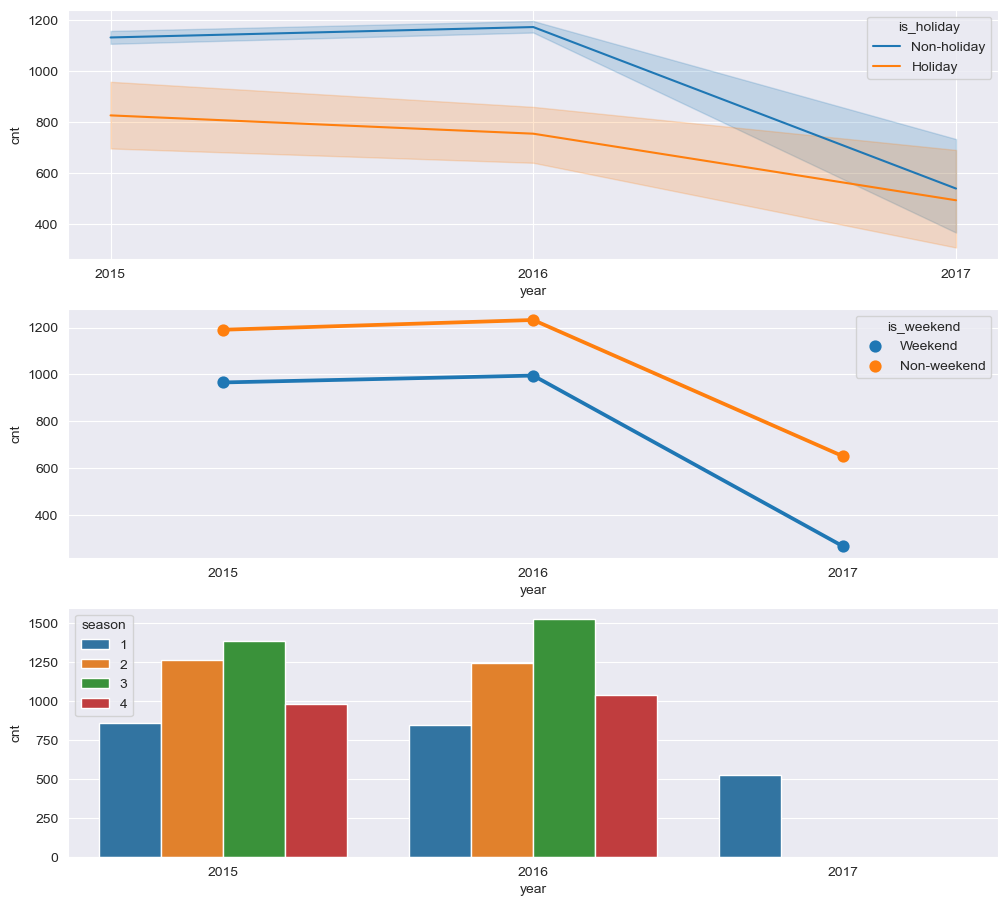

In [114]:
fig, ax = plt.subplots(3,1,figsize=(12,11))

sns.lineplot(data=df,  x="year", y="cnt", hue="is_holiday", ax=ax[0])
sns.pointplot(data=df, x="year", y="cnt", hue="is_weekend", ax=ax[1], errorbar=None)
sns.barplot(data=df,   x="year", y="cnt", hue="season",     ax=ax[2], errorbar=None)

plt.show()

* According to these graphs, the demand for bicycle hire increased slightly from 2015 to 2016.  
* The reason for the drop in 2017 is that the dataset contains only Jabuary data for this year. 

<div class="alert alert-warning alert-info">
<span style=" color:red">15. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

In [68]:
df.groupby("is_weekend")["is_weekend"].value_counts()

is_weekend
0    12444
1     4970
Name: count, dtype: int64

In [69]:
df_isweekend = df.groupby("is_weekend")["cnt"].mean()
df_isweekend

is_weekend
0    1209.274831
1     977.415694
Name: cnt, dtype: float64

In [153]:
df_isweekend = round(df_isweekend,0)

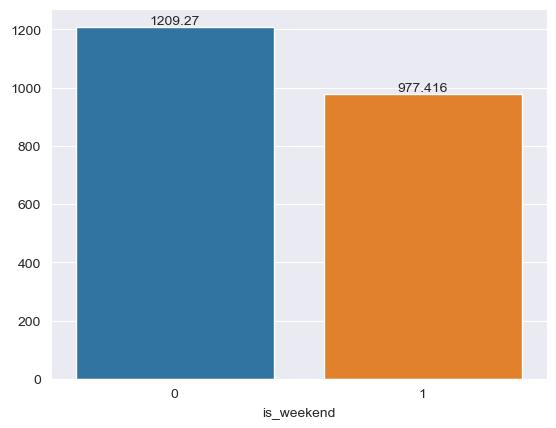

In [74]:
#  Bike shares by weekday/weekend with barchart

#plt.bar(df_isweekend.index, df_isweekend.values); # Matplotlib

# sns.barplot(data=df, x=df_isweekend.index, y=df_isweekend.values); # Saeborn

ax = sns.barplot(x=df_isweekend.index, y=df_isweekend.values, data=df, errwidth=0) # Seaborn axlarla (sutun ustlerine degerleri yazdirabilmek icin)
for i in ax.containers:
    ax.bar_label(i)



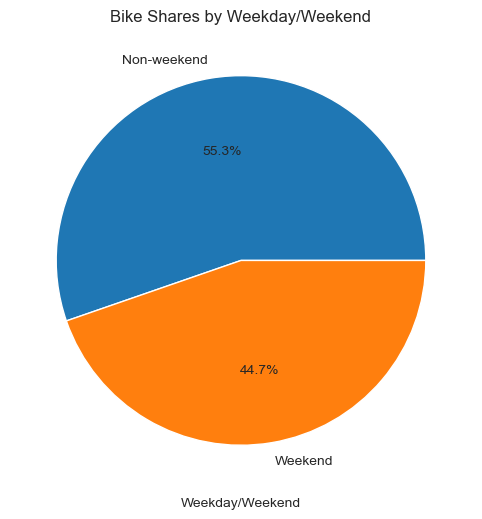

In [151]:
#  Bike shares by weekday/weekend with piechart by using Matplotlib

plt.figure(figsize=(8,6))

plt.pie( df_isweekend.values, labels= df_isweekend.index, autopct="%1.1f%%")
plt.title("Bike Shares by Weekday/Weekend")
plt.xlabel("Weekday/Weekend")

plt.show()

In [75]:
df.head(2)


,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,month,day
timestamp,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3,2015-01,04,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3,2015-01,04,0


* Demand for bicycle hire is lower at weekends. 

<div class="alert alert-warning alert-info">
<span style=" color:red">16. Plot the distribution of weather code by seasons
</span>

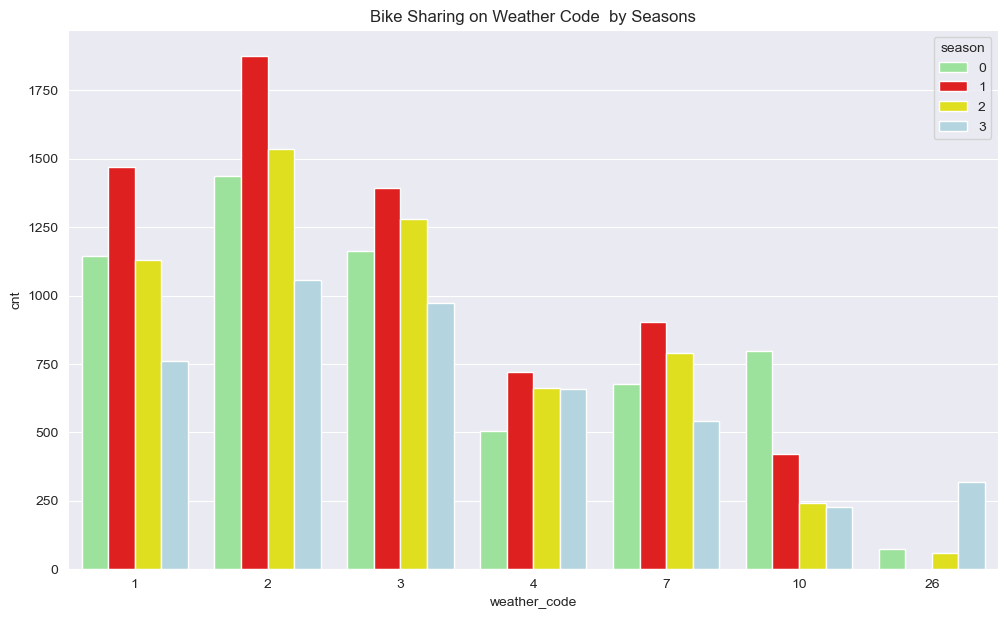

In [78]:
colors_of_seasons = ["lightgreen", "red", "yellow", "lightblue"]
plt.figure(figsize=(12,7))
sns.barplot(data=df, x="weather_code", y="cnt", hue="season", palette = colors_of_seasons, errorbar=None) # errorbar=None barların uzerinde ci cubuklarının cıkmasını onler.
plt.title("Bike Sharing on Weather Code  by Seasons")
plt.show()

* Demand for bicycle hire is higher in summer.

In [80]:
df_season = df.groupby("season")["cnt"].mean()
df_season

season
0    1103.831589
1    1464.465238
2    1178.954218
3     821.729099
Name: cnt, dtype: float64

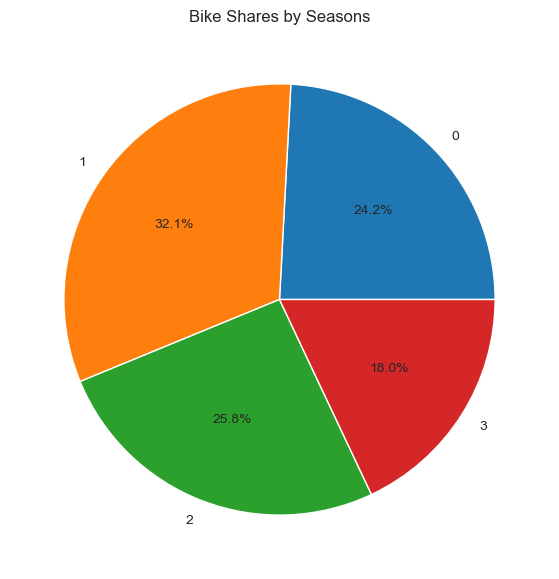

In [82]:
plt.figure(figsize=(10,7))

plt.pie( df_season.values, labels= df_season.index, autopct="%1.1f%%")
plt.title("Bike Shares by Seasons")
#plt.xlabel("Weekday/Weekend")

plt.show()

* 32% of the bicycle rental transactions took place in autumn, 25.8% in spring and 24.2% in winter.  

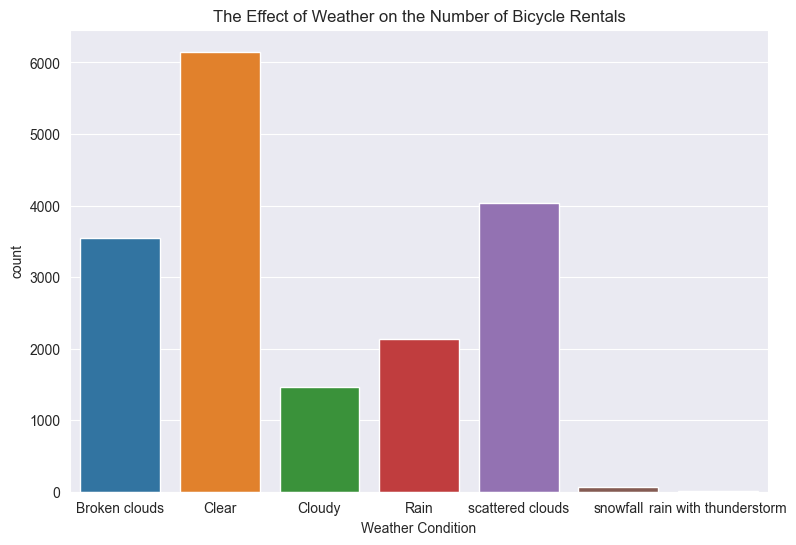

In [74]:
#For weather_condition;
plt.figure(figsize=(9,6))

sns.countplot(data=df, x=df["weather_code"])
plt.title("The Effect of Weather on the Number of Bicycle Rentals")
plt.xlabel("Weather Condition")

plt.show()

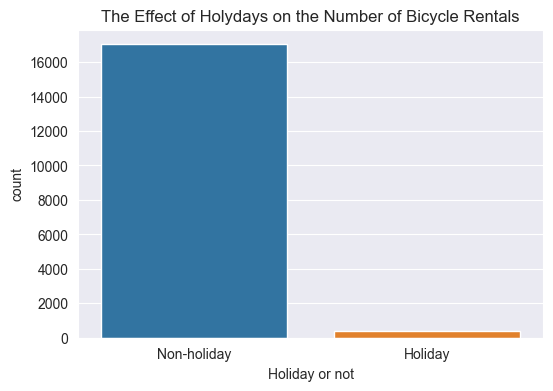

In [76]:
#For holydays

plt.figure(figsize=(6,4))

sns.countplot(data=df, x=df["is_holiday"]);
plt.title("The Effect of Holydays on the Number of Bicycle Rentals")
plt.xlabel("Holiday or not")

plt.show()

In [84]:
df["new_feature"] = df.groupby(["is_holiday"])["cnt"].value_counts().mean()
df["new_feature"]

timestamp
2015-01-04 00:00:00    4.236983
2015-01-04 01:00:00    4.236983
2015-01-04 02:00:00    4.236983
2015-01-04 03:00:00    4.236983
2015-01-04 04:00:00    4.236983
                         ...   
2017-01-03 19:00:00    4.236983
2017-01-03 20:00:00    4.236983
2017-01-03 21:00:00    4.236983
2017-01-03 22:00:00    4.236983
2017-01-03 23:00:00    4.236983
Name: new_feature, Length: 17414, dtype: float64

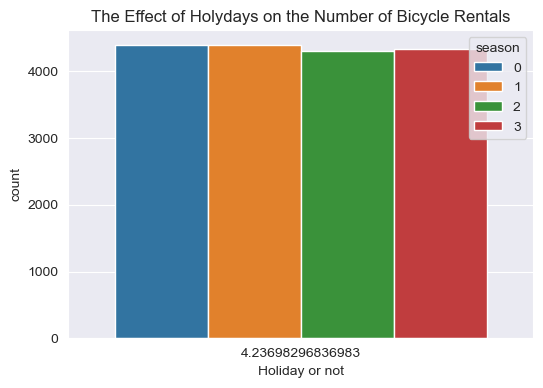

In [86]:
plt.figure(figsize=(6,4))

sns.countplot(data=df, x=df["new_feature"], hue="season" );
plt.title("The Effect of Holydays on the Number of Bicycle Rentals")
plt.xlabel("Holiday or not")

plt.show()

In [16]:
df.head(1)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,01/04/2015 00:00,182,3.0,2.0,93.0,6.0,3,0,1,3


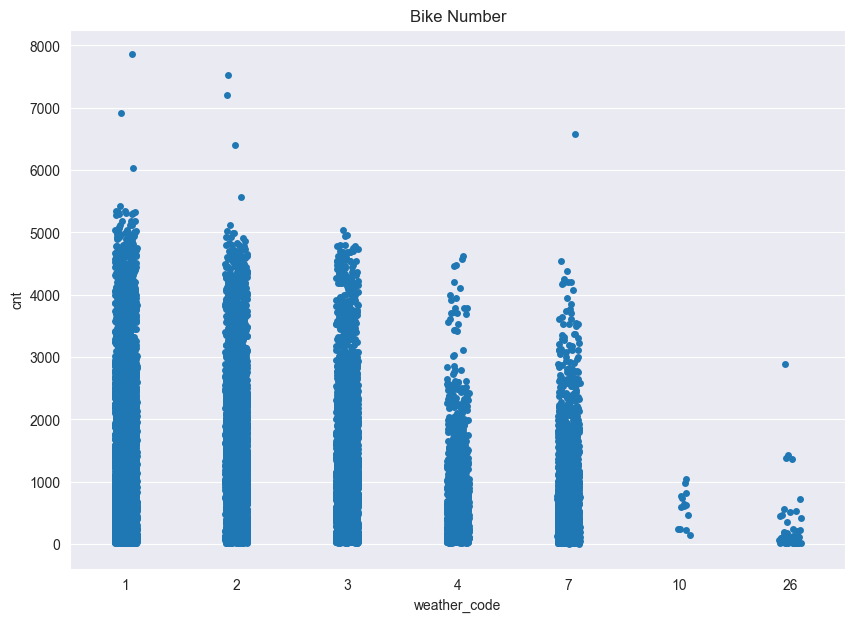

In [17]:
plt.figure(figsize=(10,7))
plt.title('Bike Number')
sns.stripplot(data=df, x="weather_code", y="cnt");

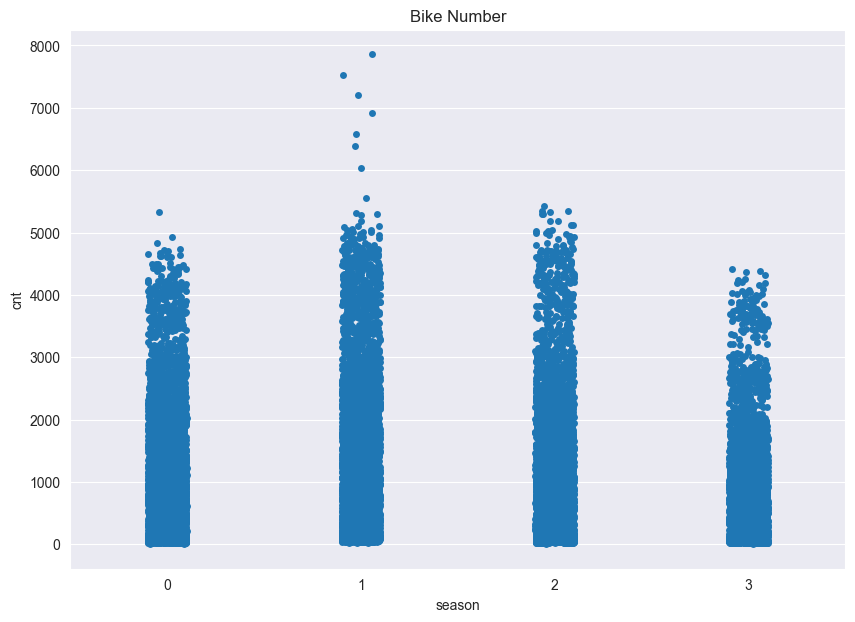

In [18]:
plt.figure(figsize=(10,7))
plt.title('Bike Number')
sns.stripplot(data=df, x="season", y="cnt");

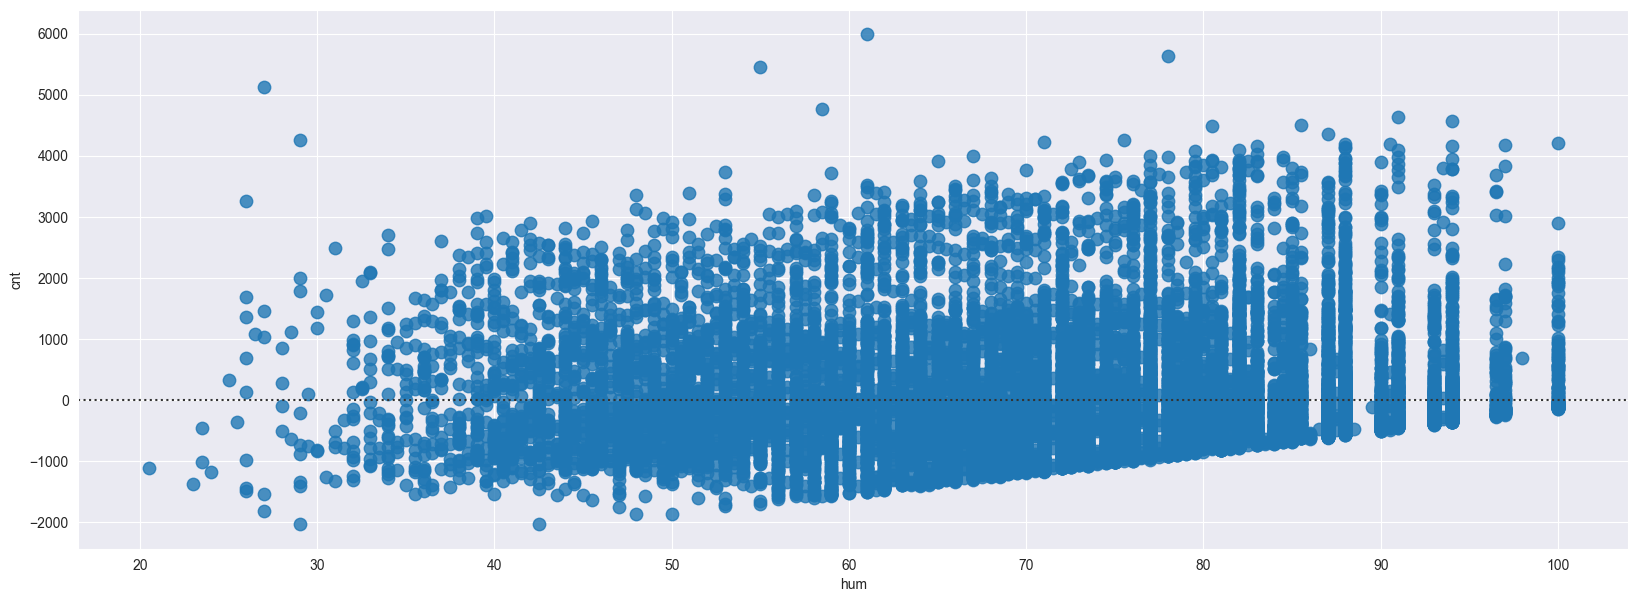

In [20]:
plt.figure(figsize=(20,7))
sns.residplot( data=df, x="hum", y="cnt", scatter_kws={"s": 80});

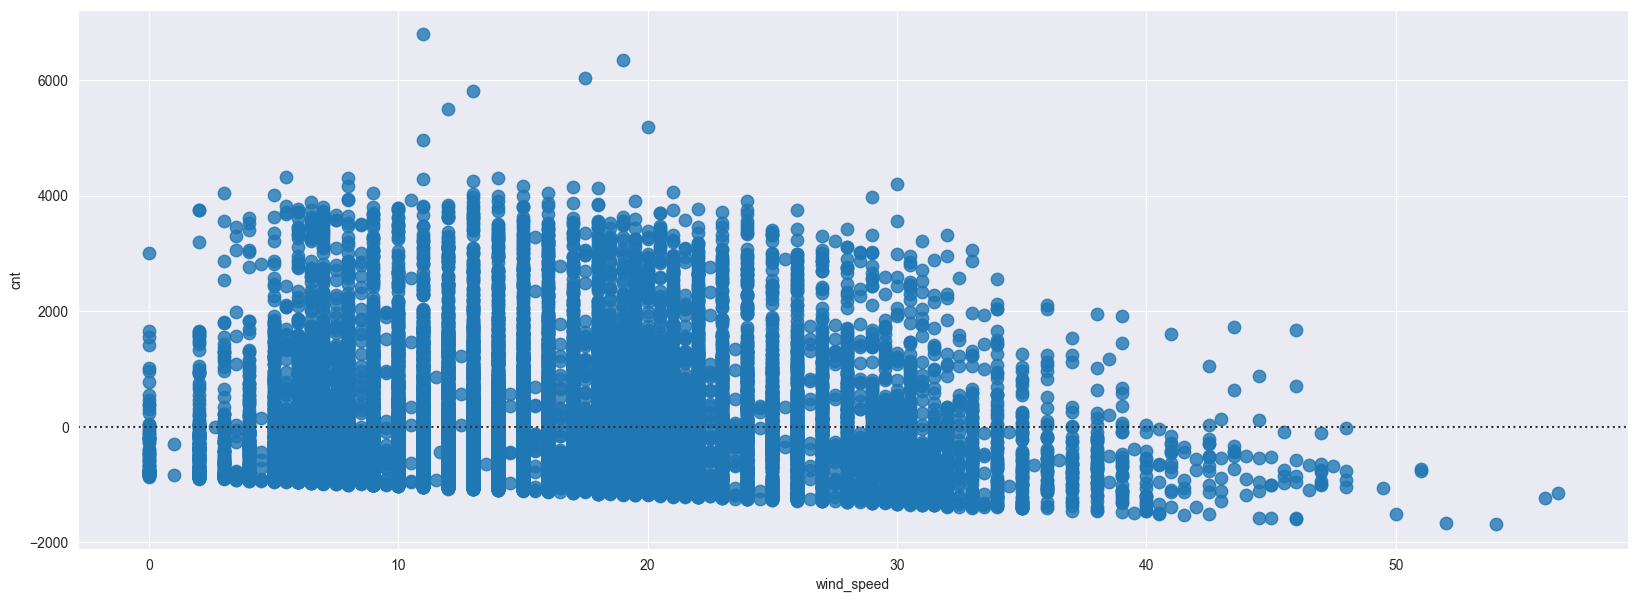

In [21]:
plt.figure(figsize=(20,7))
sns.residplot( data=df, x="wind_speed", y="cnt", scatter_kws={"s": 80});

<div class="alert alert-info alert-info ">

# <span style=" color:red">Conclusions
    

    

</span>

This study analyses the demand for bicycle hire by people living in London, the capital city of England, in the period 2015-2017. For 2017, only January data is available. According to the results obtained from the analyses;

1- People rent bicycles most often on days when the weather is "clear". In second place are the days with "scatter clouds" and in third place are the days with "broken clouds". Interestingly, more bicycles are rented on "rainy" days than on "cloudy" days. On snowy and stormy days, bicycle hire is around zero.

2- People tend to hire bicycles less on weekends and holidays. 

3- Similarly bicycle rental is slightly lower in winter and autumn then spring and summer.

4- People's demand for bicycle hire is lower on Fridays.  

5- According to correlation analysis; there is a very high (0.99) correlation between the announced air temperature (t1) and the sensed air temperature (t2) and it would be appropriate to include only one of them in the ML analyses.Lkely there is a positive and relatively strong (0.39) relationship between air temperature and the number of bicycles rented.Again there is a negative and relatively strong (0.45) relationship between air temperature (t1) and humidity. Lastly there is a negative and relatively strong (0.29) relationship between wind speed and humidity. In general; There is a positive correlation between bike sharing and temperature and a negative correlation between bike sharing and humidity.

6- As the air temperature increases, the number of bicycle rentals also increases, and when the air temperature exceeds 33 degrees Celsius, the number of bicycle rentals increases very quickly. Then when temperature exceeds 33 the number of bicycle rentals increases sharply.

7- There is a concave parabolic relationship between wind speed and bicycle hire. While people prefer to rent bicycles in light windy weather, they give up renting bicycles when the wind speed exceeds 26 km/h.

8- Demand for bicycle hire increases rapidly from March onwards, peaks in July and then starts to decline. The decline in demand accelerates after October, reaching its lowest levels between December and March.

To sum up; bicycle rental is higher on weekdays during non-holiday periods. It is higher at summers. Bicycle hire companies should make their preparations accordingly. 


<div class="alert alert-block alert-info">
<span style=" color:red">Thanks for Attending!..
    

</span>

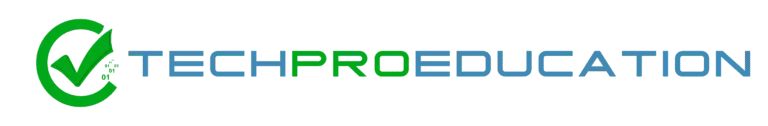